In [1]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt

2023-09-17 12:44:46.261046: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-17 12:44:46.262245: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 12:44:46.290557: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 12:44:46.291078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 12:44:46.846295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

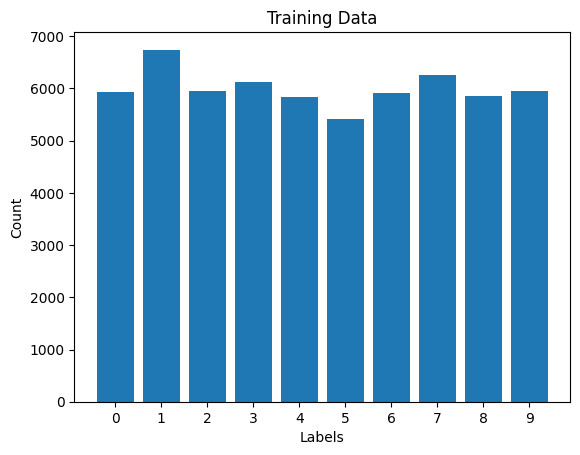

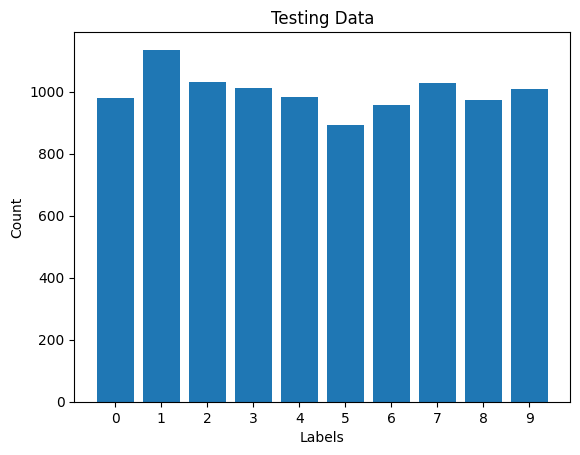

In [2]:
(x_train, y_train), (x_test, y_test) = ke.datasets.mnist.load_data()

def plotBar(data, title):
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.bar(range(len(data)), data.values(), align="center")
    plt.xticks(range(len(data)), list(data.keys()))
    plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plotBar(dict(zip(unique, counts)),'Training Data')

unique, counts = np.unique(y_test, return_counts=True)
plotBar(dict(zip(unique, counts)), 'Testing Data')


In [3]:
yTrain = ke.utils.to_categorical(y_train)
yTest = ke.utils.to_categorical(y_test)

total_pixels = x_train.shape[1] * x_train.shape[1]

x_train = np.reshape(x_train, [-1, total_pixels])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, total_pixels])
x_test = x_test.astype('float32') / 255


In [4]:
from keras import layers as lr

network = ke.models.Sequential()

network.add(lr.Dense(256, input_dim=total_pixels))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(10))
network.add(lr.Activation('softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [5]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [6]:
network.fit(x_train, yTrain, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6084 - accuracy: 0.8054
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2518 - accuracy: 0.9297
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2031 - accuracy: 0.9434
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1732 - accuracy: 0.9520
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1546 - accuracy: 0.9572
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1405 - accuracy: 0.9614
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1300 - accuracy: 0.9637
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1181 - accuracy: 0.9670
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1131 - accuracy: 0.9681
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1101 - accuracy: 0.9689

In [7]:
loss, acc = network.evaluate(x_test, yTest, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9835

Test accuracy: 98.4%
